<a href="https://colab.research.google.com/github/Sachin031003/Ping-Pong/blob/main/Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Build the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)


Epoch 1/20
782/782 - 74s - loss: 1.7871 - accuracy: 0.3348 - val_loss: 1.4366 - val_accuracy: 0.4835 - 74s/epoch - 95ms/step
Epoch 2/20
782/782 - 101s - loss: 1.4257 - accuracy: 0.4831 - val_loss: 1.2536 - val_accuracy: 0.5594 - 101s/epoch - 129ms/step
Epoch 3/20
782/782 - 85s - loss: 1.2977 - accuracy: 0.5391 - val_loss: 1.1411 - val_accuracy: 0.5955 - 85s/epoch - 109ms/step
Epoch 4/20
782/782 - 69s - loss: 1.2117 - accuracy: 0.5697 - val_loss: 1.0626 - val_accuracy: 0.6284 - 69s/epoch - 89ms/step
Epoch 5/20
782/782 - 71s - loss: 1.1438 - accuracy: 0.5960 - val_loss: 1.0175 - val_accuracy: 0.6455 - 71s/epoch - 91ms/step
Epoch 6/20
782/782 - 71s - loss: 1.1030 - accuracy: 0.6117 - val_loss: 0.9541 - val_accuracy: 0.6689 - 71s/epoch - 91ms/step
Epoch 7/20
782/782 - 69s - loss: 1.0619 - accuracy: 0.6262 - val_loss: 0.9464 - val_accuracy: 0.6698 - 69s/epoch - 88ms/step
Epoch 8/20
782/782 - 71s - loss: 1.0267 - accuracy: 0.6413 - val_loss: 0.9253 - val_accuracy: 0.6723 - 71s/epoch - 91ms/s

Test accuracy: 0.7464


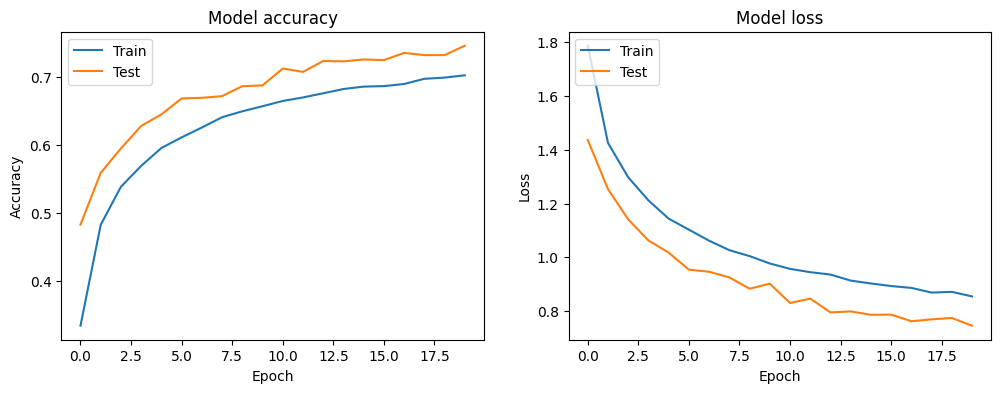

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


313/313 [==============================] - 6s 18ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      1000
           1       0.90      0.85      0.87      1000
           2       0.69      0.56      0.62      1000
           3       0.60      0.55      0.57      1000
           4       0.69      0.74      0.71      1000
           5       0.61      0.72      0.66      1000
           6       0.75      0.82      0.78      1000
           7       0.78      0.79      0.78      1000
           8       0.81      0.88      0.84      1000
           9       0.84      0.82      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



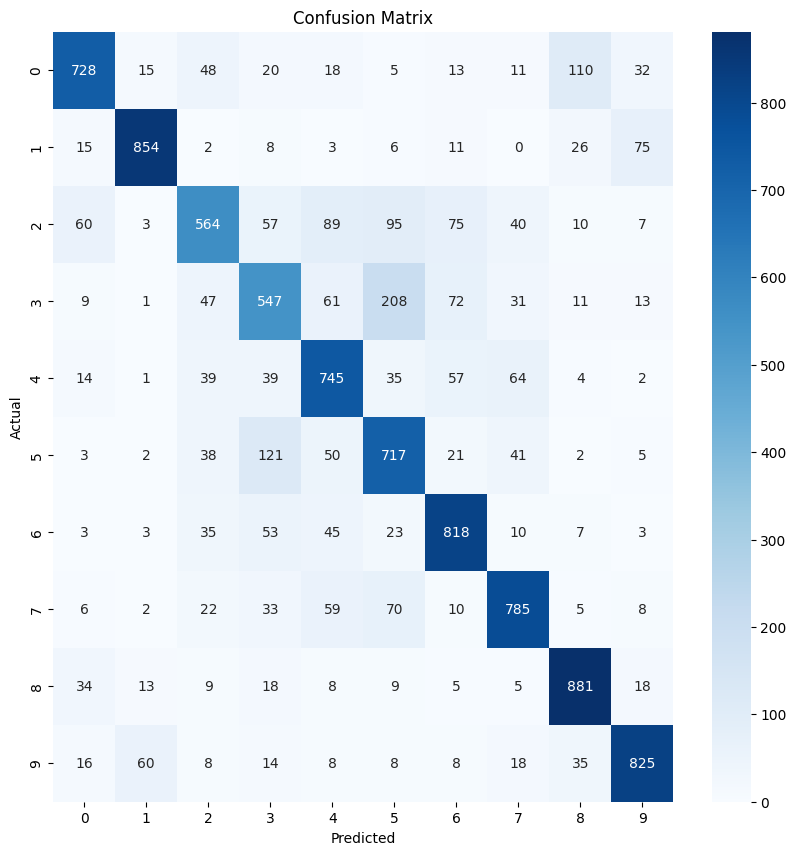

In [6]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
